<img src="https://media-exp1.licdn.com/dms/image/C4E1BAQEKOIsF4fUeLg/company-background_10000/0?e=2159024400&v=beta&t=URpnngW1v84s3H7co4-iXZ2OsbUZUcdY8pVemsQZ-3g"/>

**Let's get started!**

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

**Run the following cells before you begin.**

In [3]:
%autosave 10

Autosaving every 10 seconds


______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [4]:
# Import the data set
data=pd.read_csv('cleaned_data.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
# Define the sigmoid function

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [6]:
X=data[['PAY_1','LIMIT_BAL']]
y=data['default payment next month']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2, random_state=24)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 2)
(5333, 2)
(21331,)
(5333,)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.solver = 'liblinear'

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [11]:
# Fit the logistic regression model on training data
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Make predictions using `.predict()`
predictions=model.predict(X_test)

In [13]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
# Find class probabilities using `.predict_proba()`
class_probabilities=model.predict_proba(X_test)

In [15]:
class_probabilities

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [16]:
# Add column of 1s to features
add_ones= np.hstack([np.ones((X_test.shape[0],1)),X_test])

In [17]:
# Get coefficients and intercepts from trained model
print(model.coef_)
print(model.intercept_)

[[ 8.27451187e-11 -6.80876727e-06]]
[-6.57647457e-11]


### Manually calculate predicted probabilities


In [18]:
# We need to change the intercept into 2D array and concatinate with coefficients

In [19]:
intercept_and_coefs = np.concatenate([model.intercept_.reshape(1,1),model.coef_], axis=1)
intercept_and_coefs

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

In [20]:
# for multiplying both matrix and adding the values we use dot product in numpy

In [21]:
dp_values=np.dot(intercept_and_coefs,np.transpose(add_ones))

In [22]:
manual_predicted_probabilities=sigmoid(dp_values)

In [23]:
manual_predicted_probabilities

array([[0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
        0.33606565]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [24]:
# Manually calculate predicted classes
manual_predicted_classes=manual_predicted_probabilities>=0.5

In [25]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
manual_predicted_classes

array([[False, False, False, ..., False, False, False]])

In [27]:
manual_predicted_classes.shape

(1, 5333)

In [28]:
predictions.shape

(5333,)

In [29]:
from numpy.random import randn

In [30]:
# Compare to scikit-learn's predicted classes
compare_df= pd.DataFrame()
compare_df['model predictions']=np.array(predictions)
compare_df['manual predictions']=np.array(manual_predicted_classes.reshape(5333,))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D249A211C8>,
      dtype=object)

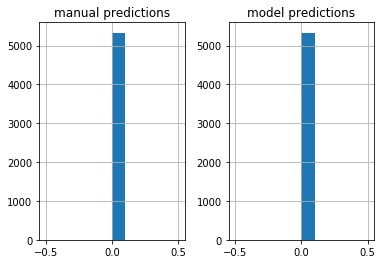

In [31]:
compare_df.hist()

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [32]:
from sklearn import metrics

In [33]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
metrics.roc_auc_score(y_test, class_probabilities[:,1])

0.627207450280691

In [34]:
# Use manually calculated predicted probabilities to calculate ROC AUC
metrics.roc_auc_score(y_test, manual_predicted_probabilities.reshape(5333,))

0.627207450280691